# Imports

In [1]:
from IPython.display import display
from IPython.display import Image as IPImage
from PIL import Image, ImageDraw, ImageTk
import math
import tkinter as tk

# Fractal Generation

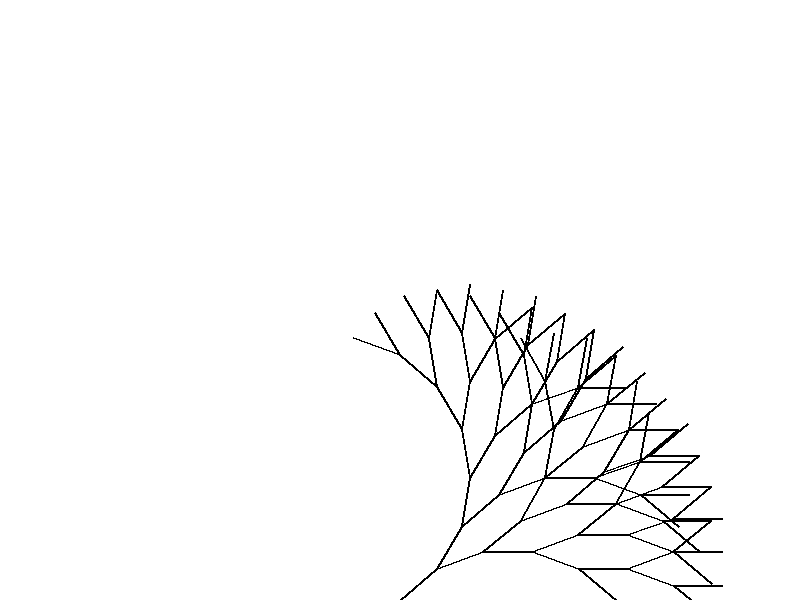

In [2]:
class FractalTreeGenerator:
    def __init__(self):
        self.root = tk.Tk()
        self.root.title("Fractal Tree Generator")
        self.image = None

        # Default parameters
        self.trunk_length = tk.DoubleVar(value=100)
        self.trunk_angle = tk.DoubleVar(value=90)
        self.branch_ratio = tk.DoubleVar(value=0.7)
        self.max_depth = tk.IntVar(value=6)

        # Create GUI elements
        self.create_widgets()

    def create_widgets(self):
        # Create a scrollable canvas
        canvas_frame = tk.Frame(self.root)
        canvas_frame.pack(fill=tk.BOTH, expand=tk.YES)

        self.canvas = tk.Canvas(canvas_frame, scrollregion=(0, 0, 800, 600), width=800, height=600, bg="white")
        self.canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=tk.YES)

        # Add a scrollbar to the canvas
        scrollbar = tk.Scrollbar(canvas_frame, command=self.canvas.yview)
        scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
        self.canvas.config(yscrollcommand=scrollbar.set)

        # Label and sliders for parameters
        tk.Label(self.canvas, text="Trunk Length").pack()
        tk.Scale(self.canvas, from_=10, to=200, variable=self.trunk_length, orient="horizontal").pack()

        tk.Label(self.canvas, text="Trunk Angle").pack()
        tk.Scale(self.canvas, from_=0, to=180, variable=self.trunk_angle, orient="horizontal").pack()

        tk.Label(self.canvas, text="Branch Ratio").pack()
        tk.Scale(self.canvas, from_=0.1, to=1.0, resolution=0.1, variable=self.branch_ratio, orient="horizontal").pack()

        tk.Label(self.canvas, text="Max Depth").pack()
        tk.Scale(self.canvas, from_=1, to=10, variable=self.max_depth, orient="horizontal").pack()

        # Button to generate and display the fractal tree
        tk.Button(self.canvas, text="Generate Fractal Tree", command=self.draw_fractal_tree).pack()

        # Button to save the generated image
        tk.Button(self.canvas, text="Save Image", command=self.save_image).pack()

        # Start the Tkinter event loop
        self.root.mainloop()

    def draw_fractal_tree(self):
        # Clear previous drawing
        self.canvas.delete("all")

        # Initialize a new ImageDraw object
        image = Image.new("RGB", (800, 600), "white")
        draw = ImageDraw.Draw(image)

        # Draw the fractal tree
        self._draw_branch(400, 600, self.trunk_length.get(), self.trunk_angle.get(), 0, draw)

        # Save the original Image object
        self.image = image

        # Convert the PIL Image to a Tkinter-compatible PhotoImage
        self.photo_image = ImageTk.PhotoImage(image)

        # Display the image on the canvas
        self.canvas.create_image(0, 0, anchor=tk.NW, image=self.photo_image)
        self.canvas.config(scrollregion=self.canvas.bbox(tk.ALL))  # Update scroll region

    def _draw_branch(self, x, y, length, angle, depth, draw):
        if depth == self.max_depth.get():
            return

        x_end = x + length * math.sin(math.radians(angle))
        y_end = y - length * math.cos(math.radians(angle))

        draw.line([(x, y), (x_end, y_end)], fill="black", width=2)

        new_length = length * self.branch_ratio.get()

        self._draw_branch(x_end, y_end, new_length, angle - 20, depth + 1, draw)
        self._draw_branch(x_end, y_end, new_length, angle + 20, depth + 1, draw)

    def save_image(self):
        # Check if the image has been generated
        if self.image:
            # Save the generated image
            filename = "fractal_tree.png"
            self.image.save(filename)

            # Open the saved image using PIL
            saved_image = Image.open(filename)

            # Convert the PIL Image to a Tkinter-compatible PhotoImage
            saved_photo_image = ImageTk.PhotoImage(saved_image)

            # Display the saved image on the canvas
            self.canvas.create_image(0, 0, anchor=tk.NW, image=saved_photo_image)
            self.canvas.config(scrollregion=self.canvas.bbox(tk.ALL))  # Update scroll region
        else:
            print("Please generate the fractal tree first.")

def display_file(filename='fractal_tree.png'):
    with open(filename, 'rb') as f:
        display(IPImage(data=f.read(), format='png'))

if __name__ == "__main__":
    FractalTreeGenerator()
    display_file()